# Employee Attrition Prediction Notebook

## Introduction

This Jupyter notebook focuses on predicting employee attrition. The notebook consists of several sections, including data preprocessing, exploratory data analysis, feature engineering, model selection, model training, model evaluation, and model interpretation. The data is loaded and cleaned using pandas, and missing values are handled appropriately. The dataset is then visualized and analyzed using matplotlib and seaborn. Feature engineering techniques are applied to create new features or transform existing ones. Model selection is performed using logistic regression, XGBoost, and random forest classifiers. The models are trained and evaluated based on accuracy, precision, recall, and F1-score.

### Uncomment cell below to download packages

In [156]:
# !pip install scikit-learn seaborn pandas xgboost numpy matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
sns.set_theme()

### Load Data

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option("display.max_columns", 35)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the descriptive table, we can observe the following:

- Age: The mean age of employees in the dataset is approximately 36.92 years, with a standard deviation of 9.14. The minimum age is 18 years, and the maximum age is 60 years. The median (50th percentile) age is 36 years.

- DailyRate: The mean daily rate of employees is approximately 802.49, with a standard deviation of 403.51. The minimum daily rate is 102, and the maximum daily rate is 1499.

- DistanceFromHome: The mean distance from home to the workplace is approximately 9.19, with a standard deviation of 8.11. The minimum distance is 1, and the maximum distance is 29.

- Education: The mean education level of employees is approximately 2.91, with a standard deviation of 1.02. The education level ranges from 1 to 5.

- MonthlyIncome: The mean monthly income of employees is approximately 6502.93, with a standard deviation of 4707.96. The minimum monthly income is 1009, and the maximum monthly income is 19999.

- NumCompaniesWorked: On average, employees have worked for approximately 2.69 companies before joining the current company, with a standard deviation of 2.50. The range of the number of companies worked for is from 0 to 9.

- YearsAtCompany: The mean number of years an employee has spent at the current company is approximately 7.01, with a standard deviation of 6.13. The minimum is 0 years, and the maximum is 40 years.

These observations provide an initial understanding of the dataset and the characteristics of the employees.

In [29]:
missing_values = data.isnull().sum()
missing_values
# print('Missing values:\n', missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values

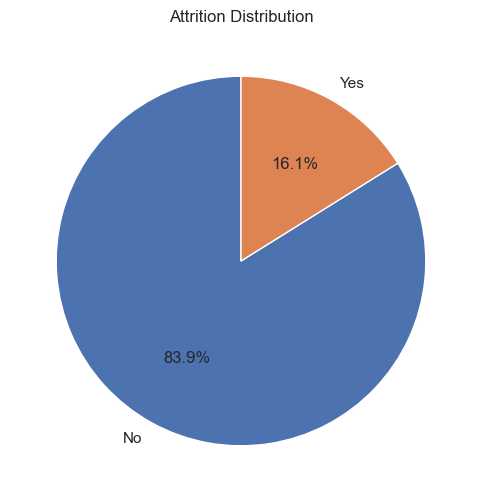

In [7]:
# Calculate the attrition count
attrition_counts = data['Attrition'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Distribution')
plt.savefig("pie.jpg")

As seen there's a huge data imbalance.

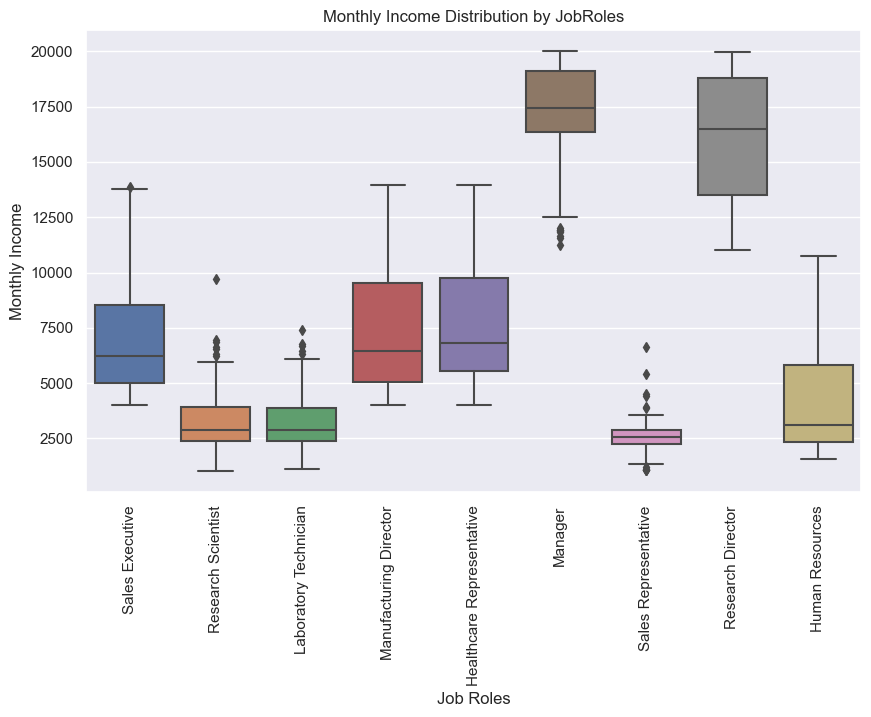

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome',data=data)
plt.title('Monthly Income Distribution by JobRoles')
plt.xlabel('Job Roles')
plt.ylabel('Monthly Income')
# plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.savefig("box.png")

- Managers, and Research Director earn relatively large sum of money. while research scientist, lab technician and sales executives well paid low sum of salary which may lead to attrition in these department

### Which job roles have higher attrition rate compared to others.

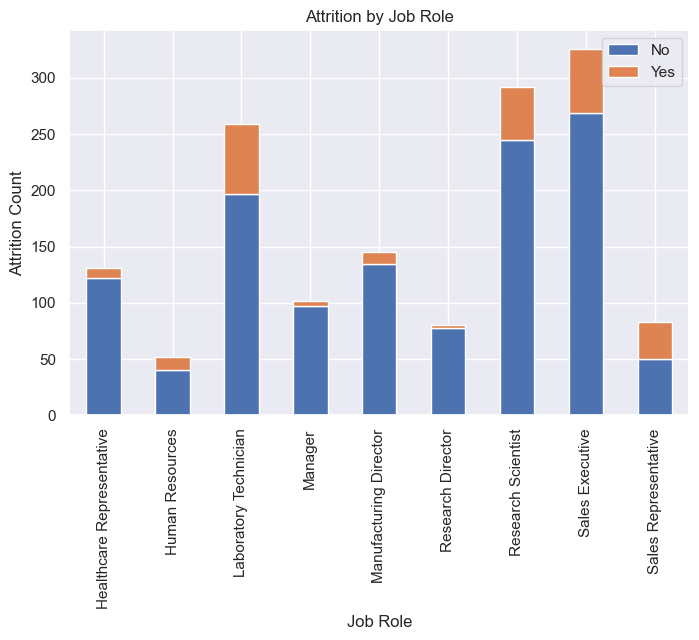

In [11]:
# Group the data by job role and calculate the attrition count
attrition_by_job_role = data.groupby('JobRole')['Attrition'].value_counts().unstack()
# Plot the bar chart
attrition_by_job_role.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Count')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.savefig("stacked.jpg")

As seen from the plot, Laboratory Technician, Research Scientist and Sales Executives have high attrition rate as compared to Manager, and Manufacturing Diectors. This could be due to the low income rate.

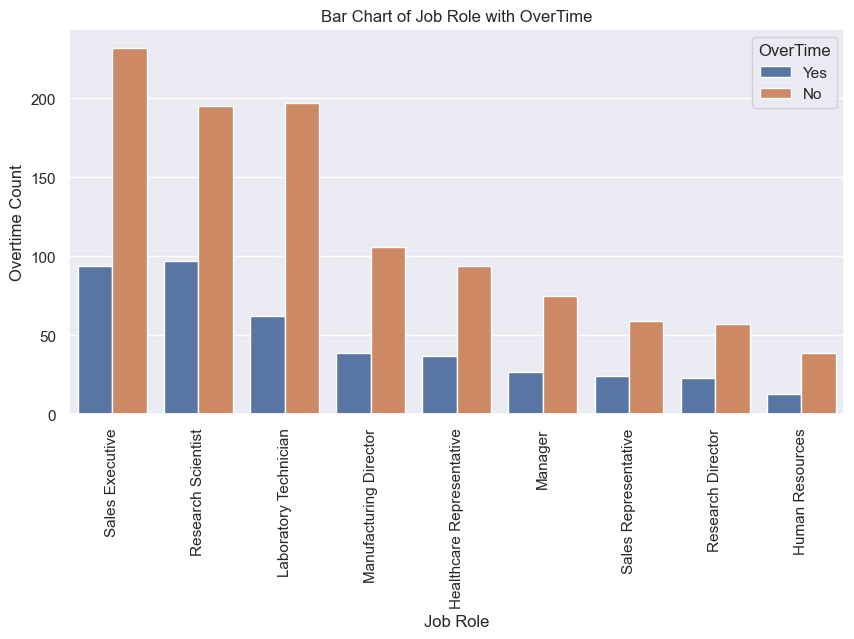

In [10]:
# Plotting a bar chart
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='JobRole', hue='OverTime')
plt.xticks(rotation=90)
plt.title('Bar Chart of Job Role with OverTime')
plt.xlabel('Job Role')
plt.ylabel('Overtime Count')
plt.legend(title='OverTime', loc='upper right')
plt.savefig("hue.jpg")

From the plot, we can see that Lab. Techinicians, Reasearch Scientist, and Sales Executive work overtime and deserves a salary rasie to avoid attrition

## Data Preprocessing

In [23]:
def preprocess_data(df):
    """
    Function that preprocesses the input data
    """
    
    #These fields does not add value, hence removed
    df = df.drop(['EmployeeCount','Over18'], axis = 1)
    
    # Encoding Categorical Variables
    le = LabelEncoder()
    cat_cols = df.select_dtypes("object").columns
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

#Apply to dataframe
processed_df = preprocess_data(data)
processed_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


### Downsample Dataset
the code keeps rows in processed_df that either have a non-zero value in the "Attrition" column or have a randomly generated number less than 0.33. The purpose of this codee is to create a subset of the original DataFrame that includes a random sample of rows with attrition or a certain percentage of the dataset for modeling.

In [24]:
processed_df = processed_df[(processed_df["Attrition"] != 0) | (np.random.rand(len(processed_df)) < .33)]

# Check remaining datapoints after downsampling
processed_df.shape

(650, 33)

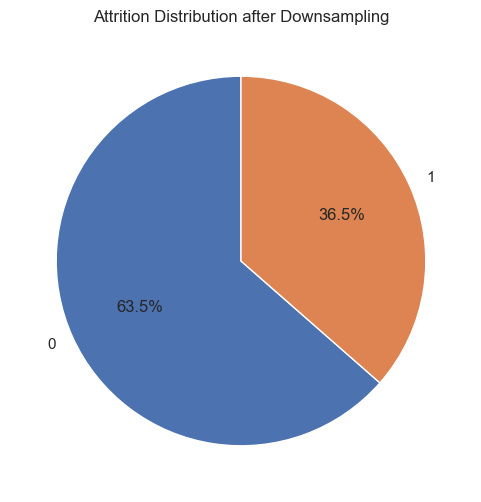

In [27]:
# Calculate the attrition count
attrition_counts = processed_df['Attrition'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Distribution after Downsampling');

## Splitting the Dataset

In [105]:
# Splitting the data into training and testing sets
X = processed_df.drop(columns=['Attrition'])
y = processed_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling

In [125]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)

# Scale the cross validation set using the mean and standard deviation of the training set
X_test_scaled = scaler_linear.transform(X_test)

### Modelling

In [240]:
# Create the individual classifiers

#Fit a Random Forest model with default parameters
rf_classifier = RandomForestClassifier()

#Fit an XGBoost model with default parameters
xgb_classifier = XGBClassifier()

#Fit a Logistic regression model with default parameters
LR = LogisticRegression()


# Model Selection
models = {
    'Logistic Regression': LR,
    'Random Forest': rf_classifier,
    "XgBoost" : xgb_classifier,
    "Ensembled Model":VotingClassifier(
                    estimators=[
                    ('xgboost', xgb_classifier),
                    ('random_forest', rf_classifier),
                    # ("ET", ET),
                    ("logistic regression",LR),
                    
                 
                  
                    ],
                    voting='hard'  # Use majority voting
    )

}

In [241]:
def evaluate_performance(models, x_train, y_train, x_test): 
    results=[]
    
    for model_name, model in models.items():
        props = {}
        m = model.fit(x_train, y_train)
        y_pred = m.predict(x_test)
        accuracy = round(accuracy_score(y_test, y_pred), 2)*100
        precision = round(precision_score(y_test, y_pred),2)*100
        recall = round(recall_score(y_test, y_pred),2)*100
        f1 = round(f1_score(y_test, y_pred), 2)*100
        props["Model"] = model_name
        props['Accuracy']= accuracy
        props['Precision']= precision
        props['Recall']=recall
        props['F1-Score']= f1
        
        results.append(props)
        
        print("="*55)
        print(f"Classification report for {model_name}\n {classification_report(y_test, y_pred)}")
        print(f"Confusion metrics for {model_name}\n {confusion_matrix(y_test, y_pred)}")
        
    df = pd.DataFrame(results)
    return df

In [242]:
evaluate_performance(models, X_train_scaled, y_train, X_test_scaled)

Classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        80
           1       0.69      0.81      0.75        47

    accuracy                           0.80       127
   macro avg       0.78      0.80      0.79       127
weighted avg       0.81      0.80      0.80       127

Confusion metrics for Logistic Regression
 [[63 17]
 [ 9 38]]
Classification report for Random Forest
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        80
           1       0.88      0.64      0.74        47

    accuracy                           0.83       127
   macro avg       0.85      0.79      0.81       127
weighted avg       0.84      0.83      0.83       127

Confusion metrics for Random Forest
 [[76  4]
 [17 30]]
Classification report for XgBoost
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,80.0,69.0,81.0,75.0
1,Random Forest,83.0,88.0,64.0,74.0
2,XgBoost,83.0,81.0,72.0,76.0
3,Ensembled Model,85.0,87.0,70.0,78.0
